# Task A2.3: Digital Health IoT dataset (7 points - Mandatory/Optional)
Dataset #1: A sample of 49 participants using an Apple Watch and a "FitBit" app for 65 minutes for 46 participants. 
This data was collected as part of a Harvard dataset (6265 rows): Apple Watch and Fitbit dataLinks to an external site., 
there are three files inside archive. We will be focusing on "aw_fb_data"


I- Based on the instruction on the distribution transformation, transform the "calories" column to take the shape of a distribution close to normal distribution. The current distribution looks something like the below figure. Experiment with different transforms (log, cube, etc.) to find the right one. Use a transform to make the data distribution more consistent, meaning there are values on each column (1pts - Mandatory)

II- As mentioned before, the data reflects 49 participants. Make a copy of the original dataframe and Find a way to keep one sample from each participant.  Therefore, the new dataframe should have 49 rows. You should use a specific function or a mix of functions in the instruction. Afterward, visualize the "age", "height", and "weight" of the participants on each subplot (stacked plot). Grids should be on, Legends should be on top, and The color of the line plot for each subplot should be different. (2pts - Optional)

III- Visualize "steps", "heart_rate", and "calories" of the first three participants in three plots with subplots (stacked plot), in a way that the steps of each three participants are depicted with different colored lines, the same for other two datasets. The legends should be on the top corner of each plot (participant #1, participant #2, participant#3) (2pts - Mandatory)

IV- Normalize the "age", "height", and "weight", and Standardize "steps" and "heart rate" columns in a separate column at the end of the dataframe (1pts - Mandatory)

V- Split the dataset into three categories with the following distribution: Train (70%), Validation (15%), and Test (15%) (1pts - Mandatory)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

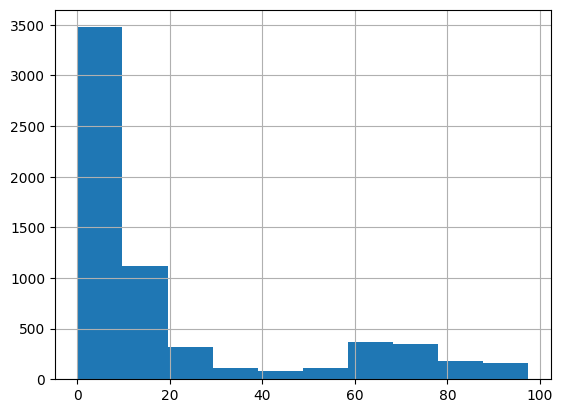

In [3]:
df = pd.read_csv('archive/aw_fb_data.csv')
df['calories'].hist()

<Axes: >

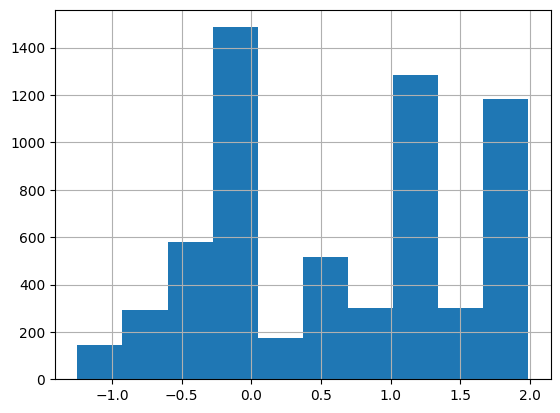

In [5]:
log_transform = df.copy()
log_transform['log'] = log_transform['calories'].transform(np.log10)
log_transform['log'].hist()

<Axes: >

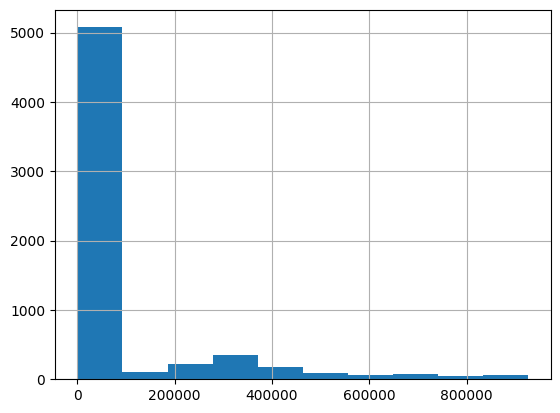

In [4]:
cube_transform = df.copy()
cube_transform['cube'] = cube_transform['calories'].transform(lambda x: np.power(x, 3))
cube_transform['cube'].hist()

<Axes: >

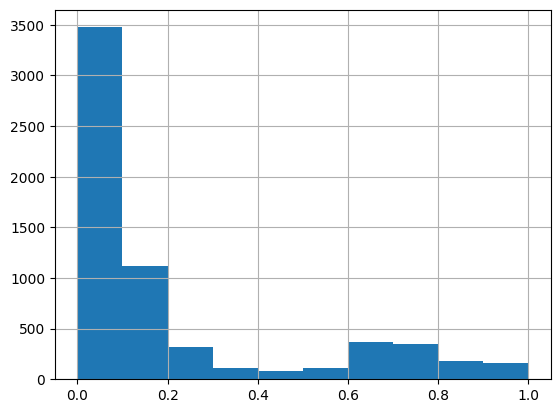

In [6]:
scaling = df.copy()
min_target = np.min(scaling['calories'])
max_target = np.max(scaling['calories'])
scaling['norm_target'] = (scaling['calories'] - min_target) / (max_target - min_target)
scaling['norm_target'].hist()

Log transform seems to be the best option for the calories column as it is the only one that makes the distribution look like a normal distribution.

# Part II
- As mentioned before, the data reflects 49 participants. Make a copy of the original dataframe and Find a way to keep one sample from each participant.  Therefore, the new dataframe should have 49 rows. You should use a specific function or a mix of functions in the instruction. Afterward, visualize the "age", "height", and "weight" of the participants on each subplot (stacked plot). Grids should be on, Legends should be on top, and The color of the line plot for each subplot should be different. (2pts - Optional)

In [7]:
df_copy = df.copy()
# filtering only these 3 columns as they are the only ones needed for plotting
# drop_duplicates() removes all duplicates from the dataset so that we can see the unique values, resulting in 49 rows
df_filtered = df_copy[['age', 'height', 'weight']].drop_duplicates()
df_filtered = df_filtered.reset_index(drop=True)
print(df_filtered.shape)

(49, 3)


RangeIndex(start=0, stop=49, step=1)


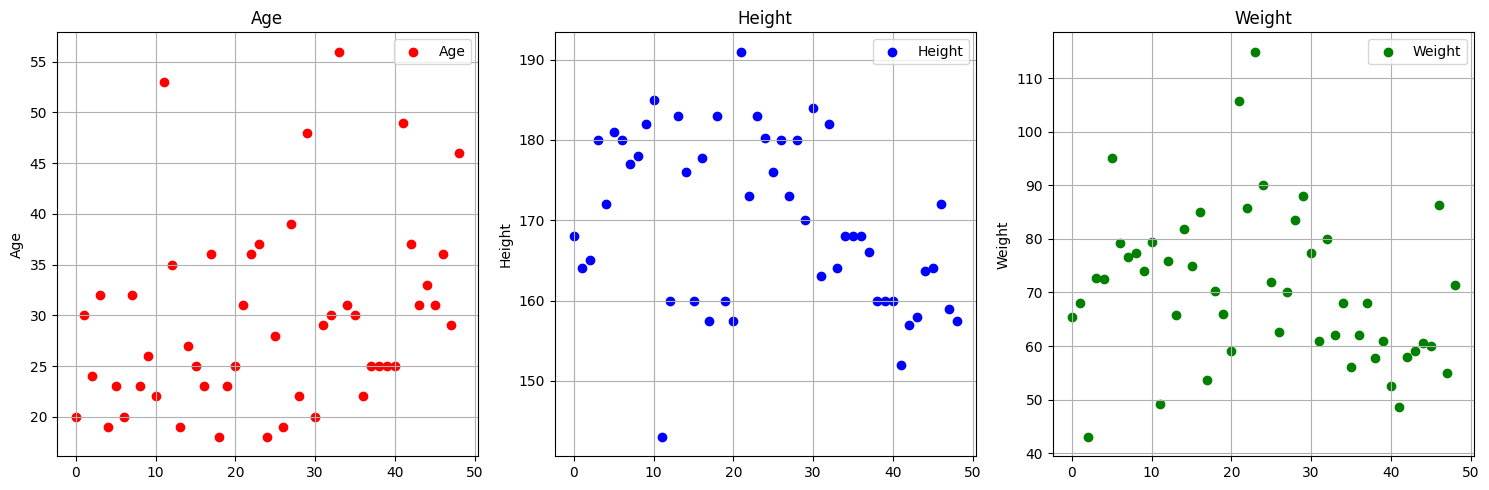

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
print(df_filtered.index)

axes[0].scatter(df_filtered.index, df_filtered['age'], color='red', label='Age')
axes[0].set_title('Age')
axes[0].set_ylabel('Age')

axes[1].scatter(df_filtered.index, df_filtered['height'], color='blue', label='Height')
axes[1].set_title('Height')
axes[1].set_ylabel('Height')


axes[2].scatter(df_filtered.index, df_filtered['weight'], color='green', label='Weight')
axes[2].set_title('Weight')
axes[2].set_ylabel('Weight')

for ax in axes:
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Part III

In [9]:
first_three = df_filtered.head(3)
# merge keeps the rows from original dataframe where age height and weight are the same as in first_three from the previously filtered dataframe with unique users
df_selected = df.merge(first_three, on=['age', 'height', 'weight'], how='inner')
df_selected = df_selected.reset_index(drop=True)
print(df_selected.shape)

(428, 20)


(3, 3)


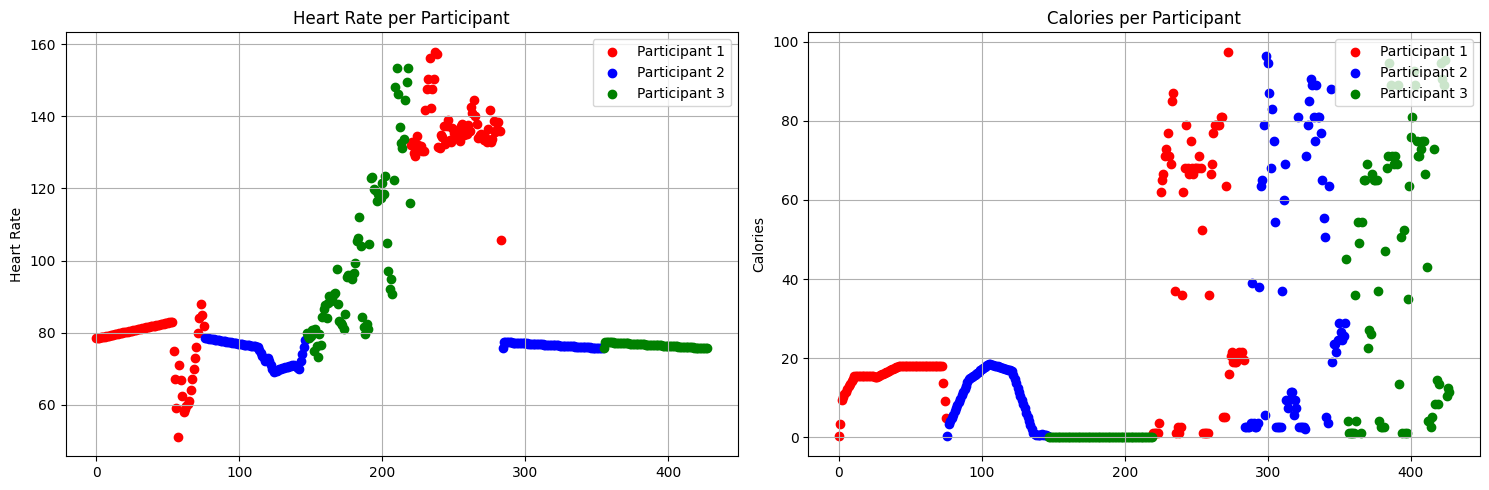

In [10]:
users = df_selected[['age', 'height', 'weight']].drop_duplicates()
colors = ['red', 'blue', 'green']
print(users.shape)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, (_, user) in enumerate(users.iterrows()):
    user_data = df_selected[
        (df_selected['age'] == user['age']) &
        (df_selected['height'] == user['height']) &
        (df_selected['weight'] == user['weight'])
    ]
    
    axes[0].scatter(user_data.index, user_data['hear_rate'], 
                 color=colors[i % len(colors)], label=f'Participant {i+1}')
    axes[1].scatter(user_data.index, user_data['calories'], 
                 color=colors[i % len(colors)], label=f'Participant {i+1}')

axes[0].set_title('Heart Rate per Participant')
axes[0].set_ylabel('Heart Rate')

axes[1].set_title('Calories per Participant')
axes[1].set_ylabel('Calories')

for ax in axes:
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Part IV

In [ ]:
print(df_selected.shape)

df_selected['age'] = (df_selected['age'] - np.min(df_selected['age'])) / (np.max(df_selected['age']) - np.min(df_selected['age']))
df_selected['height'] = (df_selected['height'] - np.min(df_selected['height'])) / (np.max(df_selected['height']) - np.min(df_selected['height']))
df_selected['weight'] = (df_selected['weight'] - np.min(df_selected['weight'])) / (np.max(df_selected['weight']) - np.min(df_selected['weight']))

df_selected['steps_standardized'] = (df_selected['steps'] - np.mean(df_selected['steps'])) / np.std(df_selected['steps'])
df_selected['hear_rate_standardized'] = (df_selected['hear_rate'] - np.mean(df_selected['hear_rate'])) / np.std(df_selected['hear_rate'])

print(df_selected.head())

(428, 20)
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1  0.0       1     1.0   0.896  10.771429  78.531302   
1           2   2  0.0       1     1.0   0.896  11.475325  78.453390   
2           3   3  0.0       1     1.0   0.896  12.179221  78.540825   
3           4   4  0.0       1     1.0   0.896  12.883117  78.628260   
4           5   5  0.0       1     1.0   0.896  13.587013  78.715695   

    calories  distance  ...  resting_heart  corr_heart_steps  norm_heart  \
0   0.344533  0.008327  ...           59.0          1.000000   19.531302   
1   3.287625  0.008896  ...           59.0          1.000000   19.453390   
2   9.484000  0.009466  ...           59.0          1.000000   19.540825   
3  10.154556  0.010035  ...           59.0          1.000000   19.628260   
4  10.825111  0.010605  ...           59.0          0.982816   19.715695   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
0            0.138520    

# Part V

In [ ]:
from sklearn.model_selection import train_test_split

train, temp = train_test_split(df, test_size=0.3, random_state=42)
print(train.shape) # training
#print(temp.shape) # temp used for validation and test

val, test = train_test_split(temp, test_size=0.5, random_state=42)

print(val.shape) # validation
print(test.shape) # test


(4384, 20)
(940, 20)
(940, 20)
